# TP 2: Keras, MNIST data y redes totalmente conectadas (FC)

### Curso-Taller 2019: Aprendizaje Automático e Imágenes en Python 
* Ejercicio 1 : Cargue la base de datos MNIST con target codificado ”onehot”, considerando la parte de entrenamiento, la de validación y la de test. 
* Ejercicio2 : Defina dos  redes totalmente conectadas diferentes que sean capaces de clasificar la base MNIST. Una con 3 capas ocultas y la otra con 5. Evalúe posible overfitting en ambas y compárelas usando la parte de entrenamiento y la parte de la base destinada para validación.
* Ejercicio 3: Use la comparación anterior para elegir un modelo. Realice las predicciones en el conjunto de test y grafique 9 imágenes mal clasificada por el modelo elegido. 
*	Ejercicio 4: Defina dos  redes convolucionales diferentes que sean capaces de clasificar la base MNIST. Utilice para entrenar ambas la base de entrenamiento aumentada (por 21=3x3x3) utilizando rotación, escala y traslación.
*	Ejercicio 5: Describa en detalle una posible aplicación de las redes convolucionales vistas en el taller a un problema de clasificación en ciencia, el estado o en la industria.


In [1]:
# librerias necesarias     
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# importo base de datos MNIST 
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

## Exploración del dataset

In [3]:
# dimensiones de la base de datos
print(f"Imagenes de Entrenamiento: {mnist.train.images.shape}")
print(f"Labels de Entrenamiento: {mnist.train.labels.shape}")

print(f"Imagenes de Testeo: {mnist.test.images.shape}")
print(f"Labels de Testeo: {mnist.test.labels.shape}")

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento: (55000, 10)
Imagenes de Testeo: (10000, 784)
Labels de Testeo: (10000, 10)


In [4]:
print(mnist.train.labels[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Cuántas imágenes de entrenamiento tiene la base? 
cuantos pixeles tiene cada una?


Etiquetas One hot Encoding:

Exploración del Data Set con Etiquetas One hot Encoding:

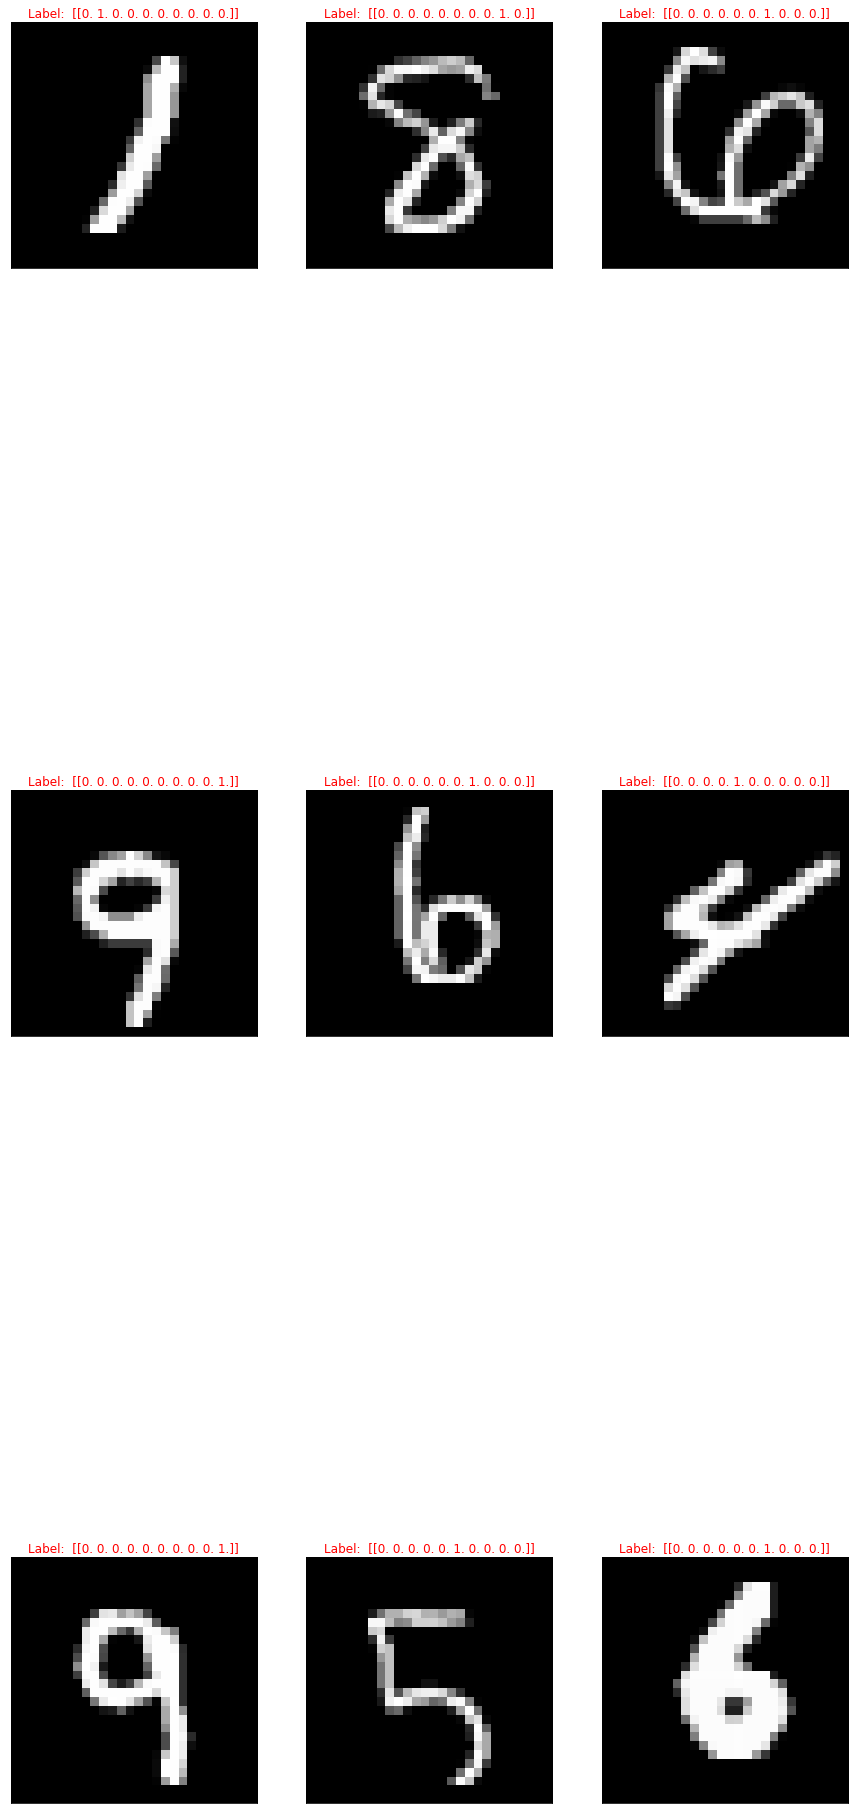

In [5]:
# visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=55000, size=1)

       ax[i,j].imshow(mnist.train.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Label:  ' + str(mnist.train.labels[random_image]), color='r')


#fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

In [6]:
print(mnist.train.images[0].shape)

(784,)


# Definición y entramiento del Modelo con 3 capas ocultas

In [7]:
entrada = Input(shape=(784,))
layer1 = Dense(32, activation='sigmoid')(entrada)

layer2 = Dense(128, activation='sigmoid')(layer1)
layer3 = Dense(80, activation='sigmoid')(layer2)
predicciones = Dense(10, activation='softmax')(layer3)

###

In [0]:
### entrada y salida del modelo definidas

model = Model(inputs=entrada, outputs=predicciones)

###

In [9]:
### optimizador y funcion de costo definidos

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

###

In [0]:
## para guardar el modelo
filepath = "prueba1.h5"
model_checkpoint = ModelCheckpoint(filepath, monitor='loss',verbose=1, save_best_only=True)

In [11]:


history = model.fit(mnist.train.images, mnist.train.labels,validation_split=0.1,  
              batch_size=32,
              epochs=50, validation_data=(mnist.test.images, mnist.test.labels), callbacks=[model_checkpoint])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 55000 samples, validate on 10000 samples
Epoch 1/50





55000/55000 [==============================] - 4s 69us/step - loss: 0.7312 - acc: 0.7842 - val_loss: 0.3327 - val_acc: 0.9064

Epoch 00001: loss improved from inf to 0.73121, saving model to prueba1.h5
Epoch 2/50
55000/55000 [==============================] - 3s 57us/step - loss: 0.2804 - acc: 0.9176 - val_loss: 0.2569 - val_acc: 0.9217

Epoch 00002: loss improved from 0.73121 to 0.28040, saving model to prueba1.h5
Epoch 3/50
55000/55000 [==============================] - 3s 57us/step - loss: 0.2182 - acc: 0.9353 - val_loss: 0.2112 - val_acc: 0.9382

Epoch 00003: loss improved from 0.28040 to 0.21817, saving model to prueba1.h5
Epoch 4/50
55000/55000 [==============================] - 3s 57us/step - loss: 0.1844 - acc: 0.9463 - val_loss: 0.1867 - val_acc: 0.9463

Epoch 00004: loss improved from 0.21817 to 0.18437, saving mode

In [12]:
np.shape(history)

()

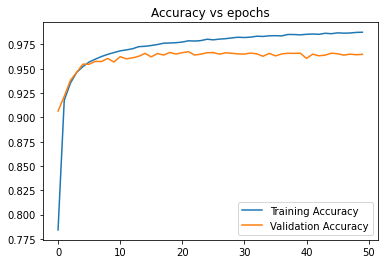

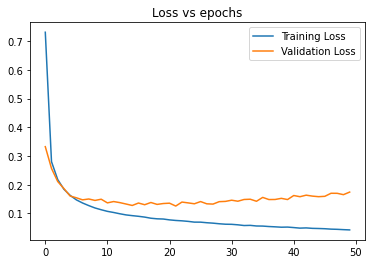

In [13]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

## Usemos este modelo para hacer predicciones

In [14]:
## A completar: utilizar imagenes de testeo

predicciones = model.predict(mnist.test.images)
print(predicciones.shape)
##

(10000, 10)


In [15]:
#fig, ax = plt.subplots(3, 3, figsize=[15, 40])

A = []
B = []
posicion = []

for k in range (10000):


  if np.argmax(mnist.test.labels[k]) != np.argmax(predicciones[k]):


    A.append(mnist.test.images[k])
    a = np.array(A)
    B.append(predicciones[k])
    b = np.array(B)
    posicion.append(k)
    
print(a.shape)
print(posicion)

(352, 784)
[8, 18, 38, 115, 149, 151, 217, 233, 241, 245, 247, 259, 290, 321, 381, 394, 465, 495, 543, 550, 565, 578, 582, 583, 610, 619, 645, 659, 716, 720, 829, 877, 890, 900, 947, 956, 965, 1014, 1039, 1044, 1062, 1107, 1112, 1128, 1152, 1156, 1182, 1191, 1226, 1232, 1242, 1247, 1253, 1289, 1299, 1319, 1364, 1395, 1413, 1500, 1522, 1527, 1530, 1531, 1549, 1581, 1601, 1609, 1626, 1681, 1737, 1755, 1790, 1800, 1901, 1909, 1910, 1936, 1941, 1965, 1984, 1987, 2016, 2018, 2024, 2044, 2053, 2070, 2073, 2098, 2109, 2129, 2135, 2182, 2186, 2224, 2237, 2266, 2293, 2325, 2329, 2338, 2369, 2371, 2387, 2406, 2422, 2433, 2454, 2476, 2534, 2574, 2635, 2648, 2654, 2670, 2705, 2743, 2760, 2832, 2836, 2850, 2877, 2921, 2925, 2927, 2939, 2970, 2995, 3012, 3021, 3030, 3073, 3110, 3115, 3117, 3130, 3157, 3254, 3295, 3330, 3336, 3358, 3369, 3383, 3405, 3441, 3451, 3503, 3520, 3533, 3549, 3558, 3567, 3597, 3604, 3606, 3674, 3702, 3718, 3749, 3751, 3757, 3769, 3776, 3778, 3796, 3808, 3811, 3817, 3818, 383

### 9 imagenes mal clasificadas por el modelo

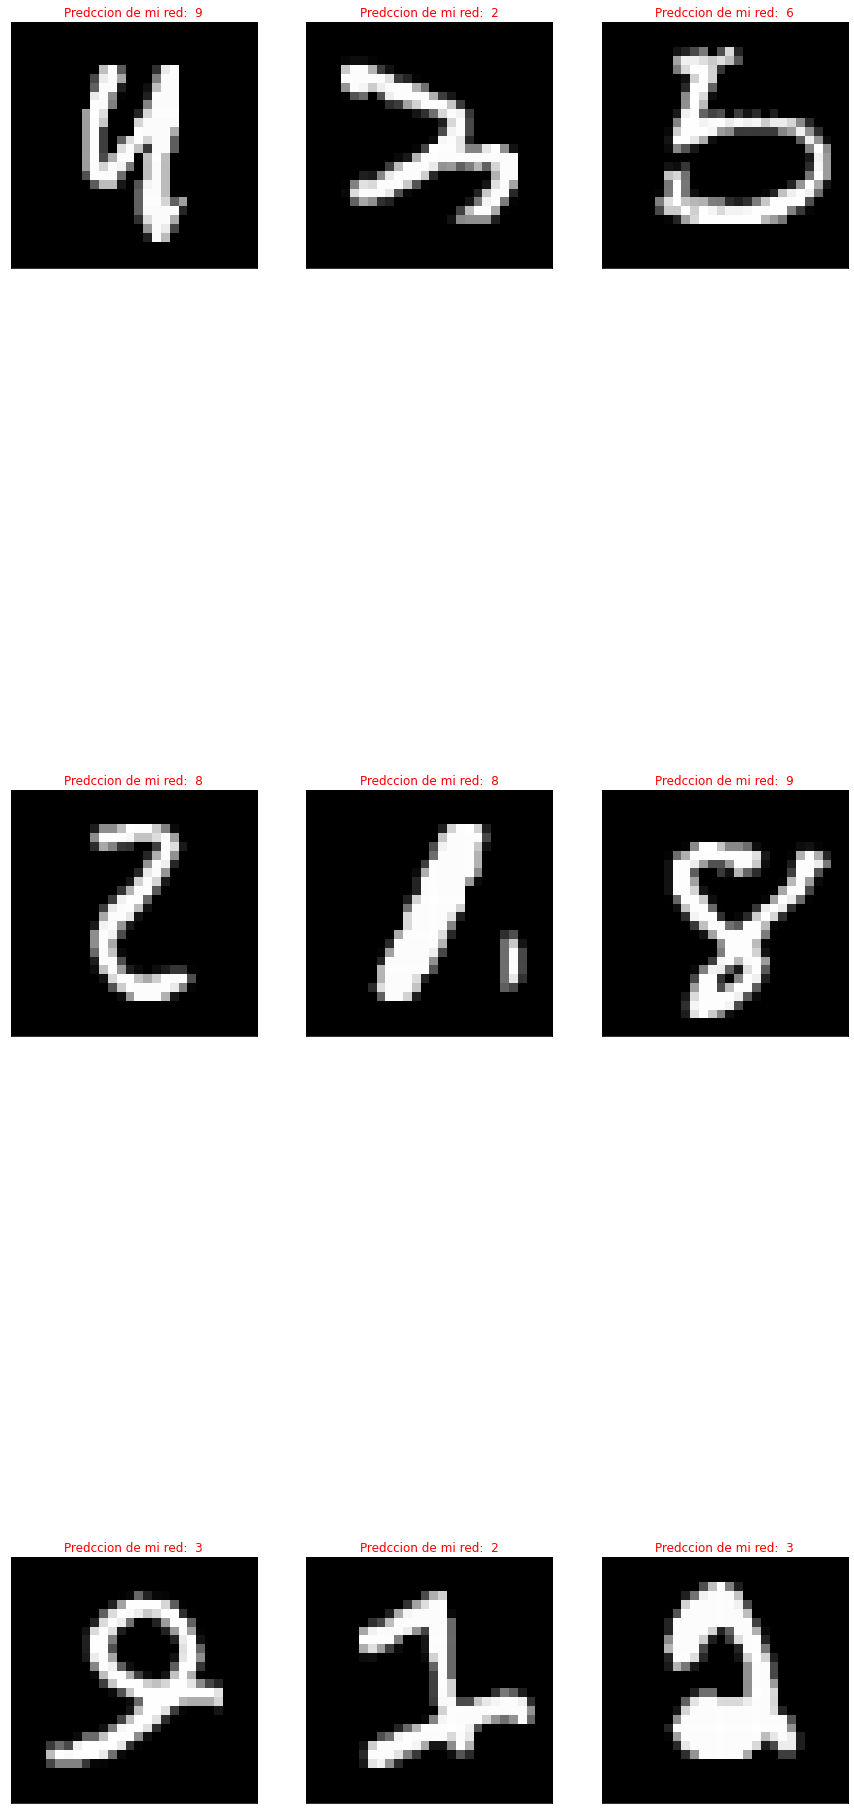

In [16]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=376, size=1)

       ax[i,j].imshow(a[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(b[random_image])), color='r')

plt.show()



### 9 imagenes elegidas al azar del grupo de test 


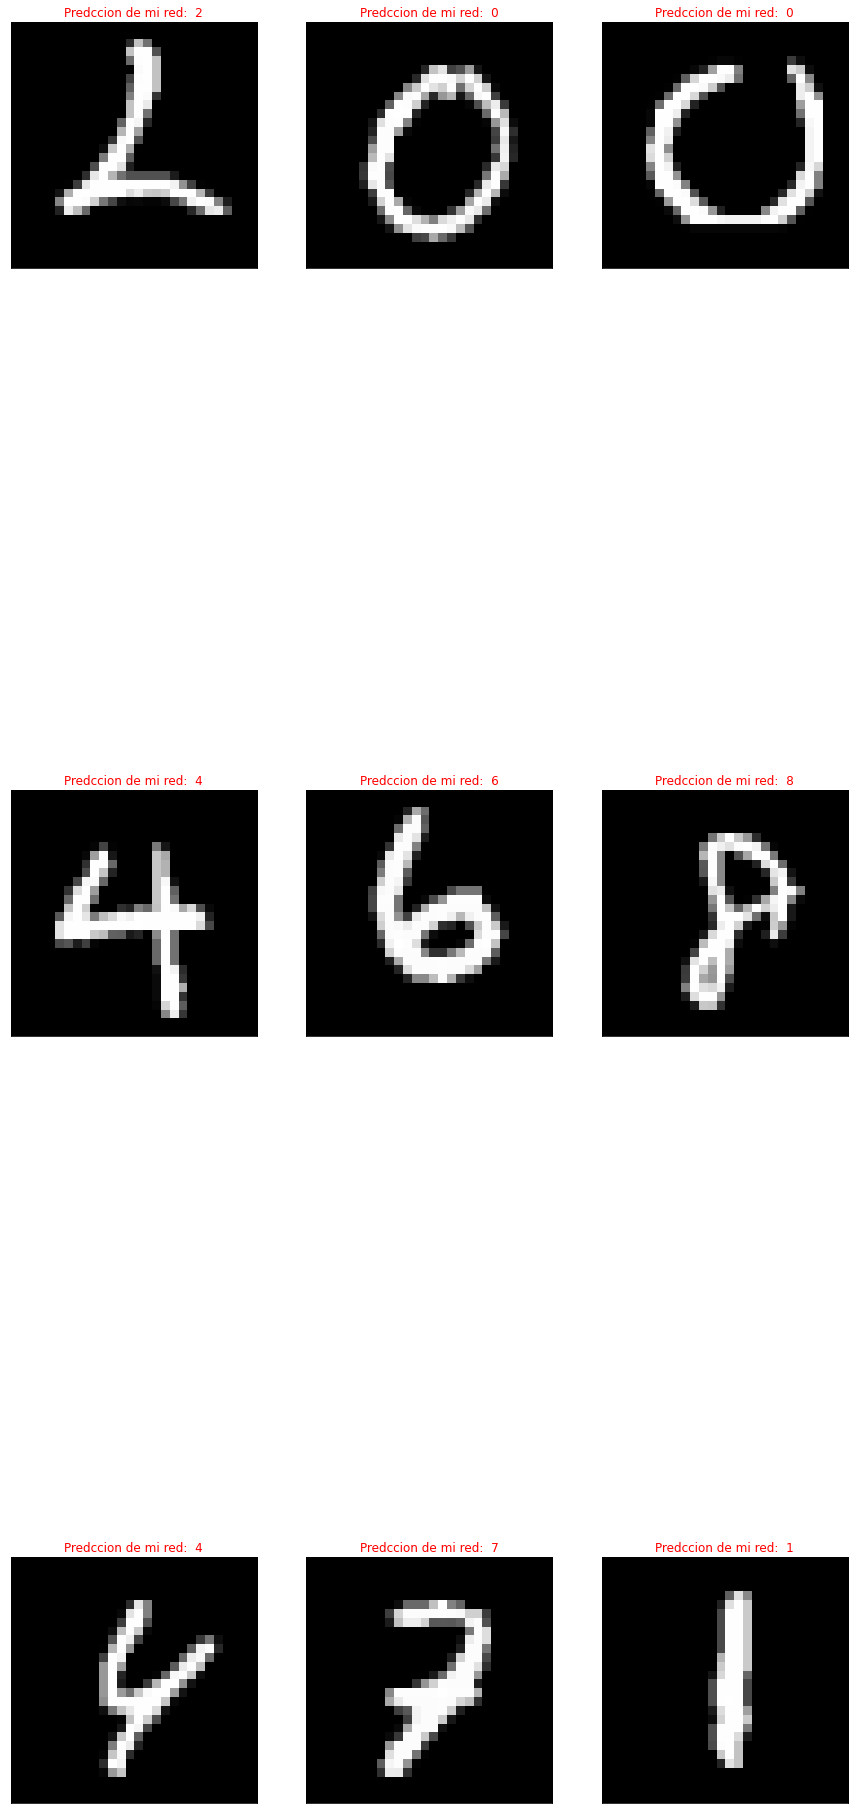

In [17]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(predicciones[random_image])), color='r')

plt.show()

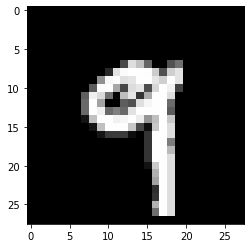

In [18]:
plt.imshow(mnist.test.images[322].reshape(28,28), 'gray')

In [19]:
print(np.argmax(predicciones[322]))

9
